### Задание 1
### Построение круговой диаграммы 
Выполните построение круговой диаграммы по данным файла Electric_Сars.csv, содержащим сведения о моделях электромобилей.

Для построения диаграммы:

1.	Сформируйте данные по количеству моделей (столбец Brand) и выполните их сортировку по столбцу TopSpeed_KmH.

2.	Используйте библиотеку matplotlib, чтобы построить круговую диаграмму по полученным в первом пункте данным. Диаграмма должна показывать долю в процентном отношении первых 5 и всех остальных моделей (rest). 

3.	Покажите на диаграмме наименование брендов и соответствующую им долю в процентах.

4.	Увеличьте радиус диаграммы в 3 раза.

5.	Сохраните график под именем auto_pie.png.

Как должно получиться:

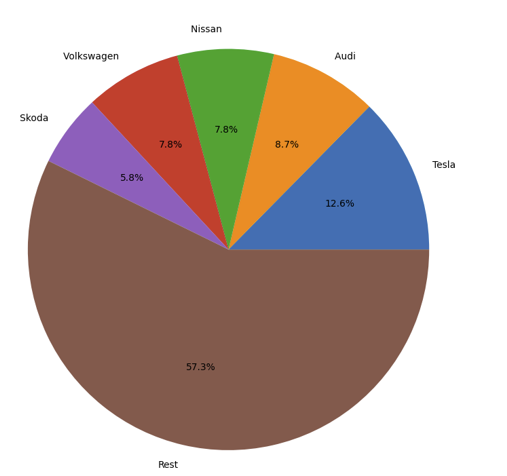

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('Electric_car.csv')

In [3]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
pie_df =  

### Задание 2
### Построение столбчатой диаграммы
Постройте горизонтальную столбчатую диаграмму по данным файла Electric_Сars.csv, который содержит сведения о моделях электромобилей.

Для построения диаграммы:

1.	Сформируйте данные по количеству различных моделей (столбец Brand) и выполните сортировку по количеству.

2.	Используйте библиотеку matplotlib, чтобы построить горизонтальную столбчатую диаграмму по данным из первого пункта.

3.	При построении диаграммы укажите наименование модели и соответствующее ей количество.

4.	Сохраните график под именем saved_figure_barh.png.

Как должно получиться:

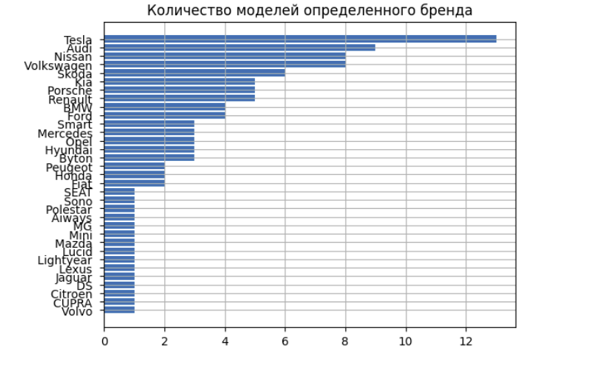

### Задание 3
### Построение и визуализация 3D-цилиндра
Напишите программу для построения и визуализации 3D-цилиндра с помощью библиотеки matplotlib.

Шаги выполнения задания:

1.	Сформируйте вершины для построения цилиндра из 20 угловых секторов. Сначала постройте вершины одного основания (круга) — используйте углы поворота и радиус окружности равный 1.

Координаты вершин основания определяются по формуле:

$0,cos(2*pi*(i)/N),sin(2*pi*(i)/N),$
где выражение $(2*pi*(i)/N)$ задает углы поворота на каждом шаге i.

2.	Аналогично постройте вершины второго основания, взяв высоту равную 1. Координаты вершин основания можно найти по формуле:

$1,cos(2*pi*(i)/N),sin(2*pi*(i)/N)$
3.	Используйте библиотеку spatial, чтобы сформировать грани для построения цилиндра из 20 угловых секторов. 

4.	Создайте сетку для построения цилиндра. 

5.	Визуализируйте полученный цилиндр.

6.	Сохраните изображение в формате stl.

Как должно получиться:

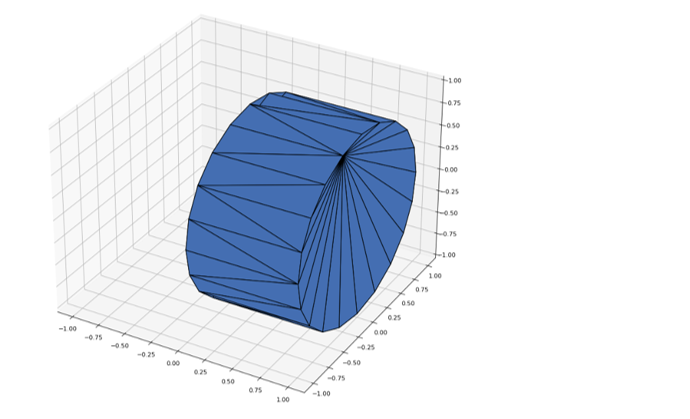